## Ferramentas utilizadas: Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Jupyter Notebook
## Técnicas: Regressão Linear, Ridge, Lasso, Feature Engineering
## Métricas: RMSE, R²


### Explicação -> Bibliotecas usadas e para que serve cada uma : 

### pandas e numpy: manipulação de dados

### matplotlib e seaborn: visualização gráfica

### scikit-learn: machine learning e métricas de avaliação

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


### Ames Housing Dataset no Kaggle

In [60]:
df = pd.read_csv('AmesHousing.csv')
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


###  Objetivo: entender tipos de dados, valores ausentes e estatísticas básicas.

In [62]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Finish     159
Garage Yr Blt     159
dtype: int64

### Correlação entre variáveis

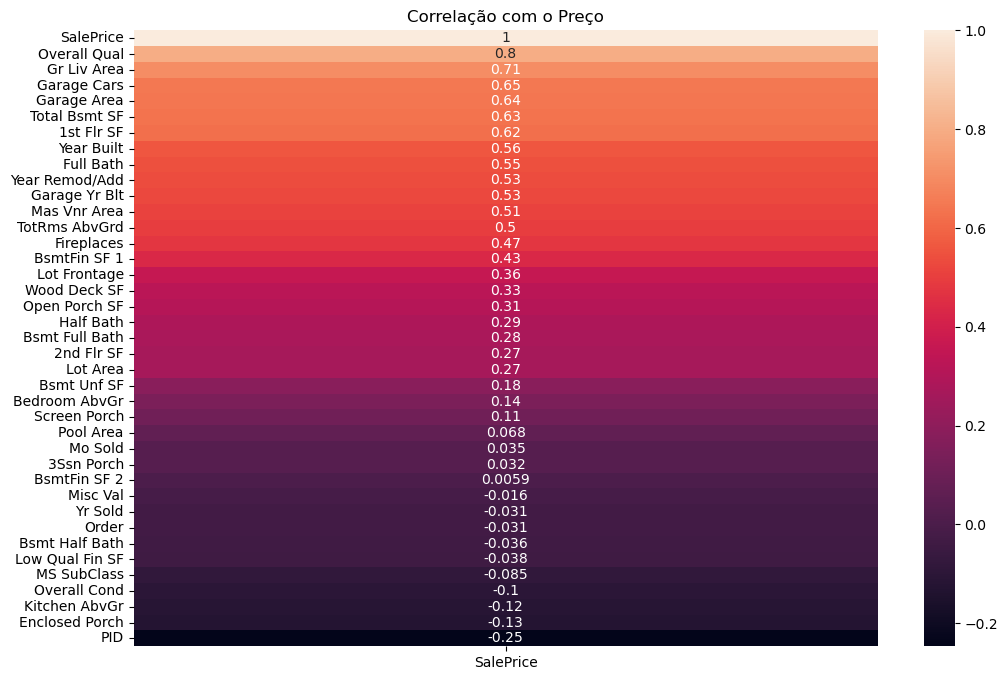

In [64]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title('Correlação com o Preço')
plt.show()


### O heatmap mostra as variáveis com maior correlação com o preço da casa.

### O histograma ajuda a entender a distribuição da variável alvo.

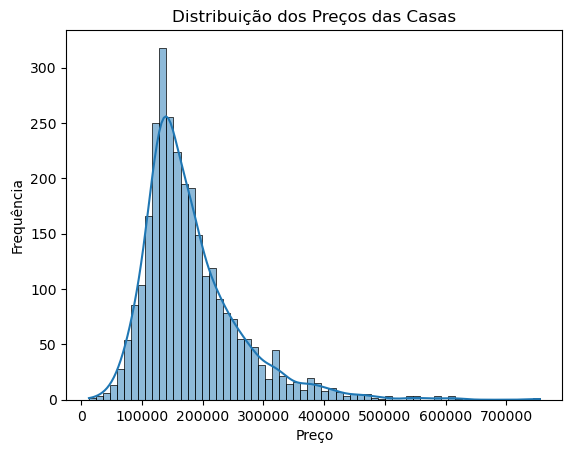

In [66]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribuição dos Preços das Casas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


### Remoção de colunas com muitos nulos

In [73]:
df = df.dropna(thresh=0.6*df.shape[0], axis=1)


### Preenchimento de nulos restantes

In [75]:
df = df.fillna(df.median(numeric_only=True))


 ### Conversão de variáveis categóricas

In [77]:
df = pd.get_dummies(df, drop_first=True)


### Separar features e target

In [79]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


### Divisão entre treino e teste

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Normalização dos dados

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 ### Treinamento dos modelos - Regressão Linear

In [85]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


### Treinamento dos modelos - Regressão Ridge

In [99]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)



 ### Treinamento dos modelos - Regressão Lasso

In [89]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


C:\Users\geise\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.073e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


###  Avaliação dos modelos

### RMSE (Root Mean Square Error): erro médio entre o valor previsto e o real. Quanto menor, melhor.
### R² (Coeficiente de Determinação): quanto o modelo explica da variabilidade da variável dependente. De 0 a 1.

In [91]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name}:')
    print(f' - RMSE: {rmse:.2f}')
    print(f' - R²: {r2:.2f}\n')

evaluate(y_test, y_pred_lr, 'Linear Regression')
evaluate(y_test, y_pred_ridge, 'Ridge Regression')
evaluate(y_test, y_pred_lasso, 'Lasso Regression')


Linear Regression:
 - RMSE: 6019642580072.38
 - R²: -4519598398923164.00

Ridge Regression:
 - RMSE: 28992.32
 - R²: 0.90

Lasso Regression:
 - RMSE: 28997.50
 - R²: 0.90



### Visualização: Preço Real vs Previsto

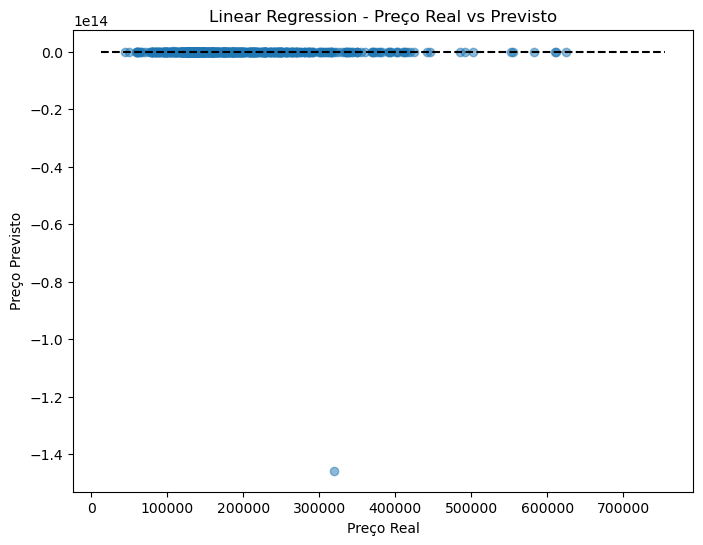

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Linear Regression - Preço Real vs Previsto')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()


# Conclusão da Análise de Dados :

### Qual Modelo performou melhor com base no RMSE e R².

### A regressão Ridge geralmente melhora resultados ao reduzir overfitting.

### A Lasso pode eliminar variáveis irrelevantes (penalização L1) - não conseguiu convergir para uma solução ideal